<div style="text-align: center;">
    <h1 style="color: red;">Anexo 2</h1>
    <h3>Proyecto 2: Aplicación de TF-IDF</h3>
    <hr/>
    <p style="text-align: right;">Mg. Luis Felipe Bustamante Narváez</p>
</div>

## Importamos los datos para su manipulación

In [124]:
import pandas as pd
df = pd.read_csv('movie_metadata.csv', encoding='UTF-8')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
# añadimos la columna id al principio de la tabla
df.insert(0, 'id', range(1, len(df)+ 1))
df

In [ ]:
# Mostramos las columnas que no se ven para poder seleccionarlas
df.iloc[:,10:20].head()


In [ ]:
# De acuerdo a esto, necesitamos las columnas id, genres, movie_title y plot_keywords
#verificamos su ubicación
df.columns


In [ ]:
# Necesitamos las columnas: 0, 10,12, 17
cols_mantener = [0, 10, 12, 17]
df_new = df.iloc[:,cols_mantener]
df_new

In [ ]:
# cambiamos los nombres de las columnas para poder utilizarlos de mejor manera
df_new = df_new.rename(columns={df_new.columns[1]:'genero', 
                                df_new.columns[2]:'titulo', 
                                df_new.columns[3]:'plot_keywords'})
df_new

In [ ]:
# necesitamos reordenar las columnas para el manejo de los datos
col_mover = df_new.pop('titulo')
df_new.insert(1, 'titulo', col_mover)
df_new

In [ ]:
# eliminamos los espacios en blanco al principio y al final de cada texto
for i in range(1, len(df_new.columns)):
    df_new.iloc[:,i] = df_new.iloc[:,i].str.strip()
df_new

In [125]:
# reemplazamos el caracter | por espacio vacío
for i in range(2, len(df_new.columns)):
    df_new.iloc[:,i] = df_new.iloc[:,i].str.replace('|', ' ')
df_new.head()

,id,titulo,genero,plot_keywords,texto
0,1,Avatar,Action Adventure Fantasy Sci-Fi,avatar future marine native paraplegic,Action Adventure Fantasy Sci-Fi avatar future ...
1,2,Pirates of the Caribbean: At World's End,Action Adventure Fantasy,goddess marriage ceremony marriage proposal pi...,Action Adventure Fantasy goddess marriage cere...
2,3,Spectre,Action Adventure Thriller,bomb espionage sequel spy terrorist,Action Adventure Thriller bomb espionage seque...
3,4,The Dark Knight Rises,Action Thriller,deception imprisonment lawlessness police offi...,Action Thriller deception imprisonment lawless...
4,5,Star Wars: Episode VII - The Force Awakens,Documentary,NaN,Documentary nan


In [ ]:
# Unimos las columnas genero y plot_keywords
df_new['texto'] = df_new[['genero', 'plot_keywords']].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
df_new

In [ ]:
# observamos con un ejemplo como quedó la columna texto
df_new['texto'].iloc[0]

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [ ]:
# vectorizamos poniendo un número máximo de tokens, entre más palabras haya, debe ser mayor este dato
tfIdf = TfidfVectorizer(max_features=3000)

In [ ]:
# Matriz de vectores (total de registros, total de dimensiones creadas)
X = tfIdf.fit_transform(df_new['texto'])
X

In [ ]:
# Creamos una serie para mapear las etiquetas de los nombres de las películas
movies = pd.Series(df_new.index, index=df_new['titulo'])
movies

In [ ]:
# Podemos buscar el índice de cada película
indice = movies['A Plague So Pleasant']
indice

In [ ]:
# consultamos
consulta = X[indice]
consulta

In [126]:
# Observamos el vector
consulta2 = consulta.toarray()
consulta2

array([[0., 0., 0., ..., 0., 0., 0.]], shape=(1, 3000))

In [ ]:
# observemos las columnas del vector donde no hay datos en cero, donde hay tokens
print(consulta)

In [127]:
# calculamos la similitud de los vectores (el valor de prueba con el resto de los datos)
simil = cosine_similarity(consulta2, X)
simil

array([[0.        , 0.        , 0.05807863, ..., 1.        , 0.64349593,
        0.        ]], shape=(1, 5043))

In [128]:
# Lo anterior muestra el arreglo de similitudes, veamos un ejemplo de similitud entre 
# la película 0 y nuestra consulta, y luego con la película 2 y nuestra consulta
comparar = 1763
a = simil[0][comparar]  #simil[consulta (siempre es 0), peli a comparar]
print(f'''La similitud entre la película 
"{df_new.iloc[comparar, 1]}" y nuestra película consultada,
"{df_new.iloc[indice, 1]}", es de {a}''')


La similitud entre la película 
"Identity" y nuestra película consultada,
"A Plague So Pleasant", es de 0.039206668970362867


In [ ]:
# calcular la similitud de manera más profesional
simil2 = simil.flatten()

In [ ]:
# ejemplo
comparar = 1763
b = simil2[comparar]  #simil[consulta (siempre es 0), peli a comparar]
print(f'''La similitud entre la película 
"{df_new.iloc[comparar, 1]}" y nuestra película consultada,
"{df_new.iloc[indice, 1]}", es de {b}''')
# Nótese que de esta manera solo se pone el valor de la película a comparar

## Gráficos de similitud

In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

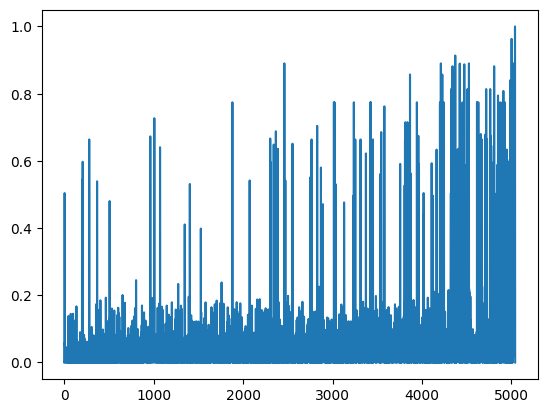

In [121]:
# Recordemos que usamos simil2 ya que esta está vectorizada con el flatten
plt.plot(simil2)
plt.show()

In [ ]:
# ordenemos la similitud
similOrden = (-simil2).argsort()
similOrden

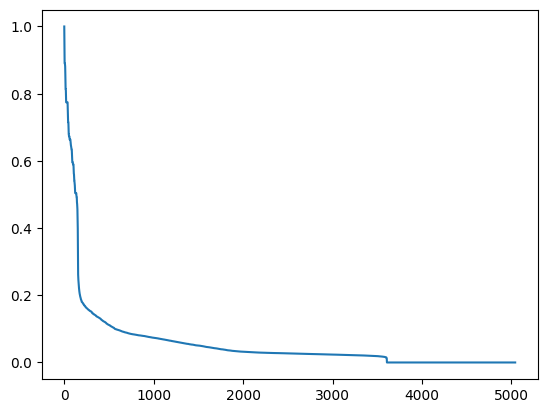

In [120]:
# graficamos ordenadamente de mayor a menor similitud
plt.plot(simil2[similOrden])
plt.show()

#Esto nos muestra una gráfia logarítmica generada por IDF

## Recomendación de películas

In [ ]:
#Ordenamos la similitud omitiendo la película de la consulta
#creando un top 10 de recomendaciones
recomendacion = (-simil2).argsort()[1:11]

In [122]:
# Creamos la lista del top10 de recomendados
df_new['titulo'].iloc[recomendacion]

5002                 Run, Hide, Die
4372    A Beginner's Guide to Snuff
4211                      Antibirth
4525          The Vatican Exorcisms
2461                    Restoration
5028                    Tin Can Man
4422                      Unsullied
4473                  Forget Me Not
4341     The Curse of Downers Grove
4807                         Fabled
Name: titulo, dtype: object

## Conclusiones

<div style="text-align: center;">
    <p>Al consultar una película cualquiera, como en el ejemplo, "A Plague So Pleasant",
    de acuerdo con el género y las plot_keywords de la tabla, podemos recomendar un top 10 de películas que tienen similitud con esta, algo básico, pero similar a lo que usan las aplicaciones de streaming como NetFlix, Disney, entre otras.</p>
    <hr/>
    <p style="text-align: right;">Mg. Luis Felipe Bustamante Narváez</p>
</div>